In [1]:
import numpy as np
def generate_real_samples(n):
    '''generate n real samples with class labels'''
    x1 = np.random.rand(n) - 0.5 #generate a random number between [-0.5,0.5]
    x2 = x1**3        #generate outputs
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    X = np.hstack((x1, x2))   #stack layers
    y = np.ones((n, 1))     #generate class label
    return X,y

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.utils import plot_model
import matplotlib.pyplot as plt

def define_discriminator(inputs = 2):
    ''' function to return the compiled discriminator model'''
    model = Sequential()
    model.add(Dense(25, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = inputs))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(15, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(5, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

discriminator_model = define_discriminator()
discriminator_model.summary()
plot_model(discriminator_model, to_file = 'discriminator_model.png', show_shapes = True, show_layer_names = True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [3]:
def define_generator(latent_dim, outputs = 2):
    model = Sequential()
    model.add(Dense(25, activation = 'relu', kernel_initializer= 'he_uniform', input_dim = latent_dim))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(15, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(outputs, activation = 'linear'))
    return model

In [4]:
latent_dim = 5
generator_model = define_generator(latent_dim)
generator_model.summary()
plot_model(generator_model, to_file = 'generator_model.png', show_shapes = True, show_layer_names = True)

/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572 (2.23 KB)

 Trainable params: 572 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [5]:
def generate_latent_points(latent_dim, n):
    '''generate points in latent space as input for the generator'''
    x_input = np.random.rand(latent_dim*n) #generate points in latent space
    x_input = x_input.reshape(n,latent_dim)  #reshape
    return x_input

def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n) #genarate points in latent space
    x = generator.predict(x_input) #predict outputs
    y = np.zeros((n, 1))
    return x, y

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


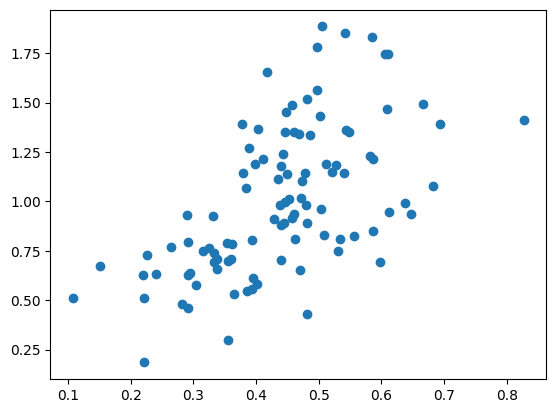

In [6]:
X, _ = generate_fake_samples(generator_model, latent_dim, 100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
def define_gan(generator, discriminator):
    '''define the combined generator and discriminator model'''
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    return model

In [8]:
gan_model = define_gan(generator_model, discriminator_model)
gan_model.summary()
plot_model(gan_model, to_file = 'gan_model.png', show_layer_names = True, show_shapes = True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 2)              │           572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │           551 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,123 (4.39 KB)

 Trainable params: 572 (2.23 KB)

 Non-trainable params: 551 (2.15 KB)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [9]:
def train_gan(g_model,d_model,gan_model,latent_dim, num_epochs = 10000,num_eval = 2000, batch_size = 128):
    ''' function to train gan model'''
    half_batch = int(batch_size/2)
  #run epochs
    for i in range(num_epochs):
        X_real, y_real = generate_real_samples(half_batch) #generate real examples
        d_model.train_on_batch(X_real, y_real)               # train on real data
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch) #generate fake samples
        d_model.train_on_batch(X_fake, y_fake)                #train on fake data
        #prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, batch_size)
        y_gan = np.ones((batch_size, 1))    #generate fake labels for gan
        gan_model.train_on_batch(x_gan, y_gan)
        if (i+1) % num_eval == 0:
            summarize_performance(i + 1, g_model, d_model, latent_dim)

In [10]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n = 100):
    '''evaluate the discriminator and plot real and fake samples'''
    x_real, y_real = generate_real_samples(n)      #generate real samples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose = 1)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose = 1)
    print('Epoch: ' + str(epoch) + ' Real Acc.: ' + str(acc_real) + ' Fake Acc.: '+ str(acc_fake))
    plt.scatter(x_real[:,0], x_real[:,1], color = 'red')
    plt.scatter(x_fake[:,0], x_fake[:,1], color = 'blue')
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

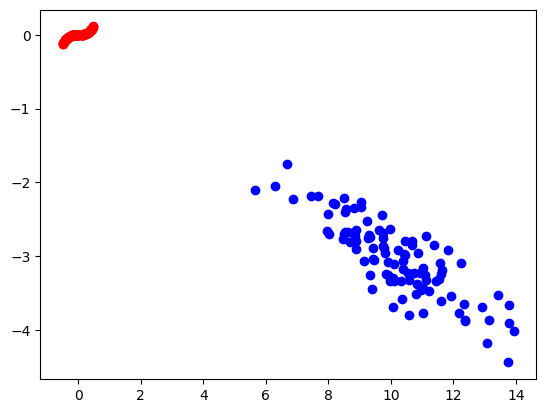

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

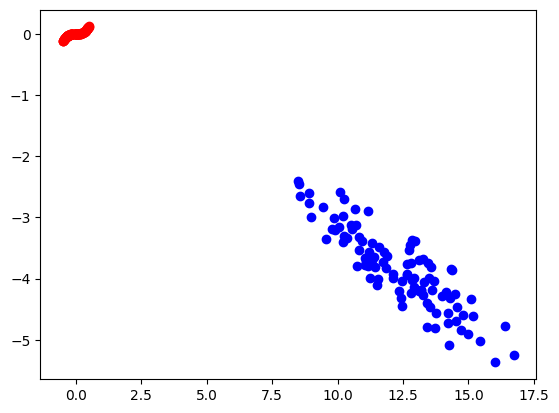

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7

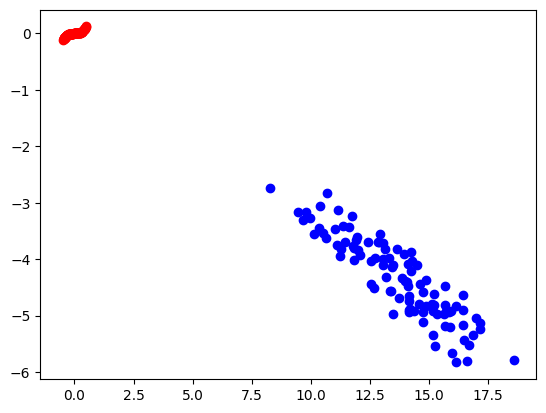

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 919u

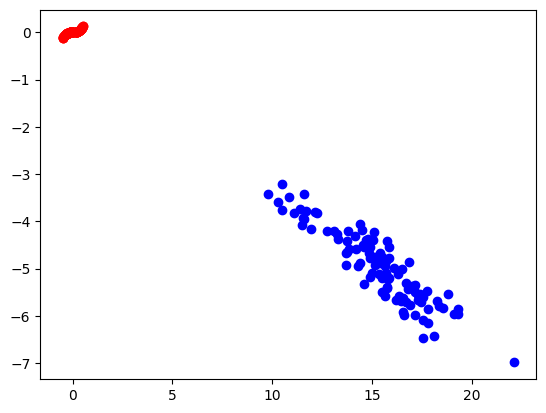

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
train_gan(generator_model, discriminator_model, gan_model, latent_dim)